In [ ]:
import numpy as np
import keras

import os
import cv2
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

import time
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt 
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [ ]:
train_path= '/content/drive/MyDrive/columbia/train'
valid_path= '/content/drive/MyDrive/columbia/test'
batch_size=32
train_batches =ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),batch_size=batch_size)
valid_batches =ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),batch_size=batch_size)

Found 4699 images belonging to 5 classes.
Found 1180 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
steps_train = train_batches.n / batch_size
steps_train


146.84375

In [ ]:
steps_valid = valid_batches.n / batch_size
steps_valid


36.875

In [ ]:
num_classes = train_batches.num_classes
num_classes

5

In [ ]:
cls_train = train_batches.classes
cls_test =  valid_batches.classes
class_names = list(train_batches.class_indices.keys())
class_names

['-15P', '-30P', '0P', '15P', '30P']

In [ ]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]
image_paths_train = path_join(train_path, train_batches.filenames)
image_paths_test = path_join(valid_path, valid_batches.filenames)

def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]
                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]
    # Convert to a numpy array and return it.
    return np.asarray(images)

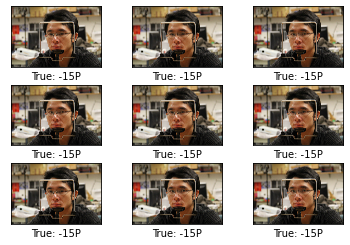

In [ ]:
# Load the first images from the train-set.
images = load_images(image_paths=image_paths_train[0:9])
# Get the true classes for those images.
cls_true = cls_train[0:9]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.layers import Input
import tensorflow as tf
from keras.models import Model
import keras
from glob import glob
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input, Dense, Flatten

input_shape = (224, 224, 3)

ResNet50= ResNet50(include_top=False, weights='imagenet')
for layer in ResNet50.layers:
  layer.trainable= False



94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers

x = ResNet50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs= ResNet50.input, outputs= predictions)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='Adam' , metrics=["accuracy"] )


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
epochs=10
#compile the model
#model.compile(Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit_generator(generator=train_batches,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=valid_batches,
                                  validation_steps=steps_valid)
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))
result = model.evaluate_generator(valid_batches, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
146/146 [==============================] - 3861s 26s/step - loss: 0.6756 - accuracy: 0.7814 - val_loss: 0.2066 - val_accuracy: 0.9661
Epoch 2/10
146/146 [==============================] - 1789s 12s/step - loss: 0.1159 - accuracy: 0.9894 - val_loss: 0.0943 - val_accuracy: 0.9788
Epoch 3/10
146/146 [==============================] - 1783s 12s/step - loss: 0.0499 - accuracy: 0.9966 - val_loss: 0.0314 - val_accuracy: 0.9983
Epoch 4/10
146/146 [==============================] - 1784s 12s/step - loss: 0.0262 - accuracy: 0.9989 - val_loss: 0.0192 - val_accuracy: 0.9992
Epoch 5/10
146/146 [==============================] - 1787s 12s/step - loss: 0.0179 - accuracy: 0.9991 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 6/10
146/146 [==============================] - 1779s 12s/step - loss: 0.0127 - accuracy: 0.9996 - val_loss: 0.0107 - val_accuracy: 0.9992
Epoch 7/10
146/146 [==============================] - 1782s 12s/step - loss: 0.0078 - accuracy: 0.9998 - val_loss: 0.0095 - val_ac

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test-set classification accuracy: 100.00%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


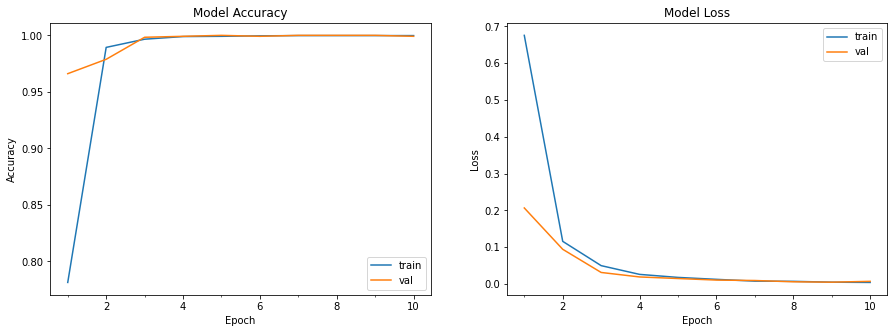

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

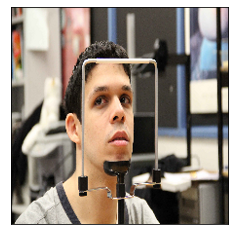

	-15P ==> 0.15 %
	-30P ==> 0.07 %
	0P ==> 0.00 %
	15P ==> 0.00 %
	30P ==> 99.78 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/columbia/test/30P/0003_2m_30P_10V_-10H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1

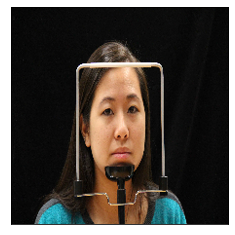

	-15P ==> 0.03 %
	-30P ==> 0.01 %
	0P ==> 25.76 %
	15P ==> 74.19 %
	30P ==> 0.01 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/columbia/test/15P/0009_2m_15P_0V_0H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1
      

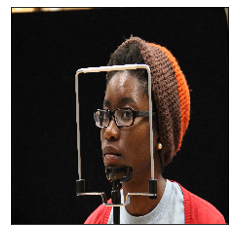

	-15P ==> 0.01 %
	-30P ==> 99.96 %
	0P ==> 0.00 %
	15P ==> 0.00 %
	30P ==> 0.03 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/columbia/test/-30P/0039_2m_-30P_10V_-5H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1
